# Results summary.

This notebook summarises the results for for the Independent and CRN test for OCBM-m and BootComp and also creates Figure 2 included in the paper.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('./figure_data/crn_results.csv')

## Comparison of BootComp and OCBA-M with CRN

The chart is not included in the main text, but is is summarised in the paper main text as opposed to a chart.

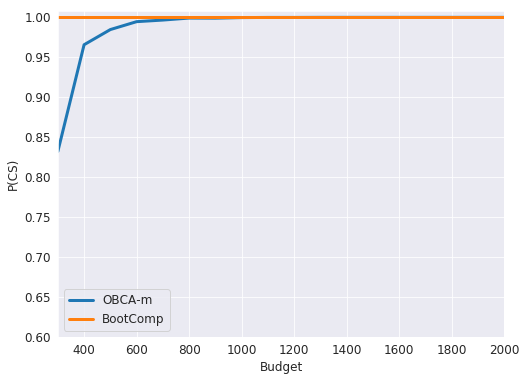

In [4]:
fig, ax = plt.subplots()
df.plot(x='Budget', y='OBCA-m', figsize=(8,6), ylim=0.6, xlim=0, ax=ax, 
        linewidth=3, fontsize=12);
ax.set_ylabel('P(CS)', fontsize=12)
ax.set_xlabel('Budget', fontsize=12)
ax.grid(True)
df.plot(x='Budget', y='BootComp', linewidth=3, ax=ax);
ax.legend(fontsize=12, loc=0);

When CRN work perfectly and the simulated designs are perfectly synchronised BootComp is able to correct select the design in each run.  OCBM-m performs well, but requires a higher budget before 100% accuracy is achieved.

## Create Figure 2 - Comparison of BootComp and OCMB-m with Independent Samples

### Read in data

In [5]:
ocba_results = './figure_data/figure2_ocba_data.csv'
bootcomp_results = './figure_data/figure2_bootcomp_data.csv'
bootcomp_results2 = './figure_data/figure2_bootcomp_data2.csv'

ocbam = pd.read_csv(ocba_results)
alpha1_0point2 = pd.read_csv(bootcomp_results)
alpha1_0point3 = pd.read_csv(bootcomp_results2)

### Plot chart and save as pdf.

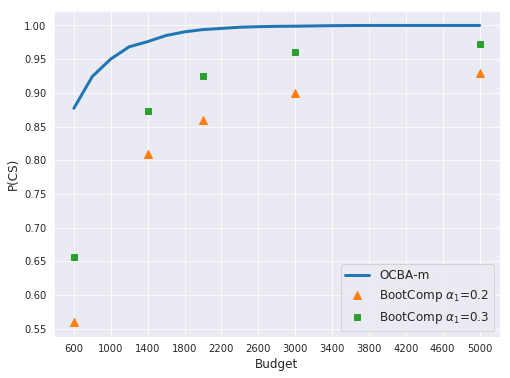

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

ax.plot('budget', 'ocba_m', data=ocbam, linewidth=3);

plt.yticks(np.linspace(0.55, 1.0, 10))
plt.xticks(np.linspace(600, 5000, ((5000-600)//400)+1))

plt.xlabel('Budget', fontsize=12)
plt.ylabel('P(CS)', fontsize=12)

ax.plot('budget', 'pcs', data=alpha1_0point2, linewidth=3, marker='^', 
        linestyle='', markersize=8)

ax.plot('budget', 'pcs', data=alpha1_0point3, linewidth=3, marker='s', 
        linestyle='',  markersize=6)

y = np.concatenate([alpha1_0point2['pcs'].to_numpy(), 
                    alpha1_0point3['pcs'].to_numpy()])
x = np.concatenate([alpha1_0point2['budget'].to_numpy(), 
                    alpha1_0point3['budget'].to_numpy()])

for i in range(len(alpha1_0point3)):
    p1, p2 = i, i + 5

ax.legend(['OCBA-m', r'BootComp $\alpha_1$=0.2', r"BootComp $\alpha_1$=0.3"], 
          fontsize=12, loc=0);

In general, bootcomp's PCS is worse than OCBA-m's when samples are completely independent.  The chart shows results for two $\beta_1$ values (0.2 and 0.3)

In [7]:
fig.savefig("./figure_images/fig2.pdf", format='pdf', dpi=600, 
            bbox_inches='tight')